<a href="https://colab.research.google.com/github/Muyikem21/Sunday_INFO5502_Spring2022/blob/main/lab_assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The seventh Lab-assignment (03/31/2022, 50 points in total)

The purpose of this exercise is to build several regression models based on real-world datasets. 

### Question 1 (25 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df=pd.read_csv("portfolio_data.csv")
df.head()









,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [4]:
# Data preparation
# Re-index data using a DatetimeIndex
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)
#Make a new subset of data for model training
#Let's keep the AMZN column for use.
df1 = df[['AMZN']] 
df1.head()

,AMZN
Date,
2013-05-01,248.229996
2013-05-02,252.550003
2013-05-03,258.049988
2013-05-06,255.720001
2013-05-07,257.730011


In [6]:
# add technical indicators using the pandas_ta library.
!pip install pandas_ta
import pandas_ta
# Add EMA to dataframe by appending
# Note: pandas_ta integrates seamlessly into
# our existing dataframe
df.ta.ema(close='AMZN', length=20, append=True) #length=20 here represents EMA for 20-day period

     |████████████████████████████████| 115 kB 5.3 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=740240eb937e9794a5e40fdb360c077bac0cb091719e7c99826a15aeb9c9199a
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


Date
2013-05-01            NaN
2013-05-02            NaN
2013-05-03            NaN
2013-05-06            NaN
2013-05-07            NaN
                 ...     
2019-05-08    1896.276213
2019-05-09    1896.618478
2019-05-10    1895.986240
2019-05-13    1889.004698
2019-05-14    1884.349012
Name: EMA_20, Length: 1520, dtype: float64

In [7]:
#drop all the rows with missing values
# Drop the first n-rows
df = df.iloc[20:]
# View our newly-formed dataset
print(df.head())

                 Date        AMZN        DPZ         BTC       NFLX  \
Date                                                                  
2013-05-30  5/30/2013  266.829987  56.015888  128.820007  31.808571   
2013-05-31  5/31/2013  269.200012  55.528717  129.300003  32.321430   
2013-06-03   6/3/2013  266.880005  55.950310  121.400002  31.709999   
2013-06-04   6/4/2013  265.700012  56.381283  121.900002  32.187141   
2013-06-05   6/5/2013  267.170013  54.666786  118.970001  31.922857   

                EMA_20  
Date                    
2013-05-30  262.640044  
2013-05-31  263.264803  
2013-06-03  263.609108  
2013-06-04  263.808242  
2013-06-05  264.128410  


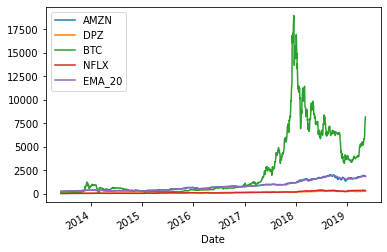

In [8]:
#Make a simple plot to check how the EMA value tracks with our value
df.plot()

The EMA value tracks so well with AMZN value

In [9]:
#Split data
#Split data into testing and training sets 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(df[['AMZN']], df[['EMA_20']], test_size=0.2)

In [10]:
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

#model evaluation
# Printout relevant metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("r2_score:", r2_score(y_test, y_pred))

Mean Squared Error: 1487.0907201012617
r2_score: 0.9944675671077424


R-squared value is high (99%), and thisimplies that our regression model is ok.

.

The heatmap is a testimony of the correlation coefficients obtained above.

### Question 2 (25 points) The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets. Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset. The dataset can be downloaded here: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/Twitter%20Sentiment%20Analysis. Please build a logistic regression model for the classification, evaluation metrics include accuracy, precision, recall, and F-1 score need to be reported. 

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#load data
train = pd.read_csv('train.csv') #train data - we will use this for training the model
test = pd.read_csv('test.csv') #test data
#train data
train.head()






,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
#test data
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
# Our data contains the expected rows and column records.

# Next, we perform data cleaning.
#Missing Values
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

The data has no missing values.

In [ ]:
#Choosing the columns which we will use
df = train[['label','tweet']]
#clean text
import re # for checking particular string matches
import nltk #contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning
nltk.download('stopwords')
from nltk.corpus import stopwords #eliminate unimportant words
from nltk.stem.porter import PorterStemmer #produce stem of words

corpus = []
for i in range(0, int(df.shape[0])):
    text = re.sub('[^a-zA-z]', ' ', df['tweet'][i])
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    text = [ps.stem(word) for word in text if not word in set(all_stopwords)]
    text = ' '.join(text)
    corpus.append(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Create bagwords
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 10000)
X = cv.fit_transform(corpus).toarray()
y = df.label

In [ ]:
#Split data into train and test sets, 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#Model training and evaluation
#Logistic Regression
#instantiate the model
classifier = LogisticRegression(random_state = 42)

#fit model with train set
classifier.fit(X_train, y_train)

#make predictions using test set
y_pred = classifier.predict(X_test)

#evaluate the model
print('accuracy_score = ',accuracy_score(y_test,y_pred))
print('precision_score = ',precision_score(y_test,y_pred))
print('recall_score = ',recall_score(y_test,y_pred))
print('f1_score = ',f1_score(y_test,y_pred))
 




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


accuracy_score =  0.9594869388393555
precision_score =  0.8229508196721311
recall_score =  0.5504385964912281
f1_score =  0.6596583442838371
